In [2]:
import torch
from torch.utils.data.dataloader import DataLoader
from auto_encoder import AutoEncoder
from masked_dataset import get_data
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


In [3]:
train_set, val_set, test_set = get_data(dataset="CIFAR10", masking_ratio=0.01)

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /Users/barissen/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
batch_size = 12
train_loader = DataLoader(train_set, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size, num_workers=4, pin_memory=True)


In [5]:
for masked_input, full_input, unmasked_indices in train_loader:
    print('image shape:', full_input.shape)
    full = full_input.reshape(batch_size, 3, 224, 224)
    masked = masked_input.reshape(batch_size, 3, 224, 224)
    break


image shape: torch.Size([12, 3, 50176])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


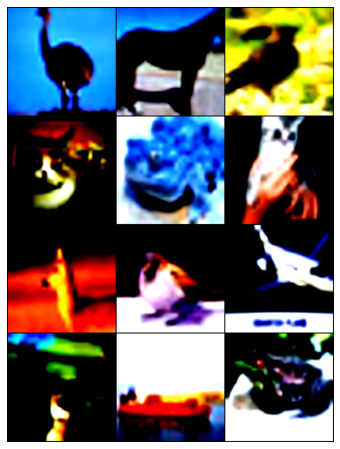

In [6]:
plt.figure(figsize=(16, 8))
plt.axis('off')
plt.imshow(make_grid(full, nrow=3).permute((1, 2, 0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


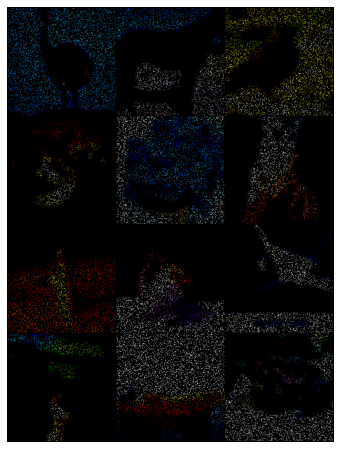

In [7]:
plt.figure(figsize=(16, 8))
plt.axis('off')
plt.imshow(make_grid(masked, nrow=3).permute((1, 2, 0)))


In [51]:
# Sample pass on the AutoEncoder
in_channel_size = 3
model = AutoEncoder(in_channel_size=in_channel_size)
pred = model(masked_input)
print(masked_input.shape, pred.shape)

torch.Size([12, 3, 1024]) torch.Size([12, 3, 1024])
